In [1]:
import pandas as pd 
import re

df = pd.read_csv('messages.csv')

In [2]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
df.shape

(2893, 3)

In [4]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

# DROP NULL VALUE

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [7]:
df.shape

(2831, 3)

In [8]:
df.groupby('label').count()

,subject,message
label,,
0,2363,2363
1,468,468


# DATA CLEAN

In [9]:
import string
def lower(raw_docs):
    a=""
    for i in raw_docs:
        a=a+i.lower()
    return a

In [10]:
def removeSpecailChar(col):
    return re.sub('[^A-Za-z0-9]+', ' ', col)

In [11]:
from nltk import stem
from nltk.corpus import stopwords
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))
def remStop(msg):  
    # converting messages to lowercase  
    msg = msg.lower()    # removing stopwords   
    msg = [word for word in msg.split() if word not in stopwords]    # using a stemmer 
    msg = " ".join([stemmer.stem(word) for word in msg])   
    return msg

In [12]:
df["subject"]=df.subject.apply(lower)
df["message"]=df.message.apply(lower)

In [13]:
df["subject"]=df.subject.apply(removeSpecailChar)

In [14]:
df["message"]=df.message.apply(removeSpecailChar)

In [15]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-15-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [16]:
df.head(5)

,subject,message,label
0,job posting apple iss research center,content length 3386 apple iss research center a us 10 million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or speech signal processing is desirable both candidates will have a phd with at least 2 to 4 years of relevant work experience or a technical msc degree with at least 5 to 7 years of experienc e very strong software engineering skills including design and implementation and productization are required in these positions knowledge of c c and unix are preferred a unix c programmer we are looking for an experienced unix c programmer preferably with good industry experience to join us in breaking new frontiers strong knowledge of unix tools compilers linkers make x windows e mac and experience in matlab required sun and silicon graphic experience is an advantage programmers with less than two years industry experience need not apply these positions include interaction with scientists in the national university of singapore and with apple s speech research and productization efforts located in cupertino california attendance and publication in international scientific engineering conferences is encouraged benefits include an internationally competitive salary housing subsidy and relocation expenses send a complete resume enclosing personal particulars qualifications experience and contact telephone number to mr jean luc lebrun center manager apple iss research center institute of systems science heng mui keng terrace singapore 0511 tel 65 772 6571 fax 65 776 4005 email jllebrun iss nus sg,0
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas satamas umabnet ab umd edu a research associate at the university of maryland at baltimore his field is molecular biology and his work involves comparing dna strings using various algorithms i do n t understand the details well enough to pass them along at any rate one such algorithm relies upon frequencies with which the letters g a t and c occur in the dna strings he would like to explore the analogous use of letter sound frequencies in natural language texts hence this posting specifically sergei wonders if any linguist subscribers could help steer him to recent literature concerning text identification based on letter frequencies any suggestions could be sent directly to him at the above address or to me and i ll pass them along he would also be interested in collaborative work if this research connects with the work of any linguists or text processing specialists he observes that very often work in one field would actually help work in a far removed field if only people knew what was going on over there george fowler george fowler gfowler indiana edu email dept of slavic languages 1 317 726 1482 home try here first ballantine 502 1 812 855 2624 2608 9906 dept indiana university 1 812 855 2829 office bloomington in 47405 usa 1 812 855 2107 dept fax,0
3,risk,a colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required we would be inte

In [17]:
from nltk.corpus import stopwords
def stopWord(col):
    stopword_list=stopwords.words('english')
    
    msg = [word for word in col.split() if word not in stopword_list and word not in 'iss']
    str1=""
    for i in msg:
        str1=str1+str(i)+" "
    return str1
    

In [18]:
df["subject1"]=df.subject.apply(stopWord)
df["message1"]=df.message.apply(stopWord)

In [19]:
#df=df.drop(['subject2','message2'], axis = 1) 

In [20]:
stopword_list=stopwords.words('english')

In [21]:
df.head()

,subject,message,label,subject1,message1
0,job posting apple iss research center,content length 3386 apple iss research center a us 10 million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or speech signal processing is desirable both candidates will have a phd with at least 2 to 4 years of relevant work experience or a technical msc degree with at least 5 to 7 years of experienc e very strong software engineering skills including design and implementation and productization are required in these positions knowledge of c c and unix are preferred a unix c programmer we are looking for an experienced unix c programmer preferably with good industry experience to join us in breaking new frontiers strong knowledge of unix tools compilers linkers make x windows e mac and experience in matlab required sun and silicon graphic experience is an advantage programmers with less than two years industry experience need not apply these positions include interaction with scientists in the national university of singapore and with apple s speech research and productization efforts located in cupertino california attendance and publication in international scientific engineering conferences is encouraged benefits include an internationally competitive salary housing subsidy and relocation expenses send a complete resume enclosing personal particulars qualifications experience and contact telephone number to mr jean luc lebrun center manager apple iss research center institute of systems science heng mui keng terrace singapore 0511 tel 65 772 6571 fax 65 776 4005 email jllebrun iss nus sg,0,job posting apple research center,content length 3386 apple research center us 10 million joint venture apple computer inc institute systems science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge state art corpus based n gram language models cache language models part speech language models required text speech project leader successful candidate research expertise expertise two following areas computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidates phd least 2 4 years relevant work experience technical msc degree least 5 7 years experienc e strong software engineering skills including design implementation productization required positions knowledge c c unix preferred unix c programmer looking experienced unix c programmer preferably good industry experience join us breaking new frontiers strong knowledge unix tools compilers linkers make x windows e mac experience matlab required sun silicon graphic experience advantage programmers less two years industry experience need apply positions include interaction scientists national university singapore apple speech research 

In [22]:
import nltk
def stemmer(col):
    sno = nltk.stem.SnowballStemmer('english')
    str1=""
    for i in col.split():
        str1=str1+sno.stem(i)+" "
    return str1


In [23]:
df["subject1"]=df.subject1.apply(stemmer)
df["message1"]=df.message1.apply(stemmer)

In [24]:
stemmer("apple apple apple")

'appl appl appl '

In [25]:
df.head()

,subject,message,label,subject1,message1
0,job posting apple iss research center,content length 3386 apple iss research center a us 10 million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or speech signal processing is desirable both candidates will have a phd with at least 2 to 4 years of relevant work experience or a technical msc degree with at least 5 to 7 years of experienc e very strong software engineering skills including design and implementation and productization are required in these positions knowledge of c c and unix are preferred a unix c programmer we are looking for an experienced unix c programmer preferably with good industry experience to join us in breaking new frontiers strong knowledge of unix tools compilers linkers make x windows e mac and experience in matlab required sun and silicon graphic experience is an advantage programmers with less than two years industry experience need not apply these positions include interaction with scientists in the national university of singapore and with apple s speech research and productization efforts located in cupertino california attendance and publication in international scientific engineering conferences is encouraged benefits include an internationally competitive salary housing subsidy and relocation expenses send a complete resume enclosing personal particulars qualifications experience and contact telephone number to mr jean luc lebrun center manager apple iss research center institute of systems science heng mui keng terrace singapore 0511 tel 65 772 6571 fax 65 776 4005 email jllebrun iss nus sg,0,job post appl research center,content length 3386 appl research center us 10 million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpus base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least 2 4 year relev work experi technic msc degre least 5 7 year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri experi join us break new frontier strong knowledg unix tool compil linker make x window e mac experi matlab requir sun silicon graphic experi advantag programm less two year industri experi need appli posit includ interact scientist nation univers singapor appl speech research product effort locat cupertino california attend public intern scientif engin confer encourag benefit includ intern competit salari hous subsidi reloc expens send complet resum enclos person particular qualif experi contact telephon number mr jean luc lebrun cente

# FORM A WORD CLOUD

In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [27]:
#pip install wordcloud

In [28]:
wordcloud=WordCloud(width=1000,height=500).generate(' '.join(df['message1']))

In [29]:
wordcloud1=WordCloud(width=1000,height=500).generate(' '.join(df['subject1']))

In [30]:
plt.figure(figsize=(35,18))

<Figure size 2520x1296 with 0 Axes>

<Figure size 2520x1296 with 0 Axes>

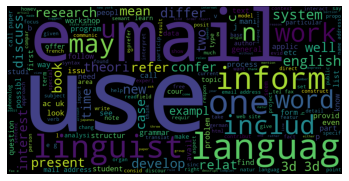

In [31]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

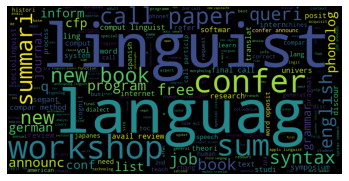

In [32]:
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# create the transform
vectorizer = CountVectorizer()

In [35]:


# tokenize and build vocab
vectorizer.fit(df.subject1)

CountVectorizer()

In [36]:
#print(vectorizer.vocabulary_)

In [37]:
vectorizer.fit(df.message1)

CountVectorizer()

In [38]:
print(vectorizer.vocabulary_)

{'content': 12932, 'length': 27056, '3386': 2498, 'appl': 7281, 'research': 37172, 'center': 11342, 'us': 45157, '10': 442, 'million': 29901, 'joint': 24610, 'ventur': 45624, 'comput': 12647, 'inc': 23077, 'institut': 23487, 'system': 42187, 'scienc': 38930, 'nation': 31281, 'univers': 44821, 'singapor': 40002, 'locat': 27745, 'look': 27852, 'senior': 39273, 'speech': 40786, 'scientist': 38939, 'success': 41700, 'candid': 10841, 'expertis': 17519, 'linguist': 27482, 'includ': 23095, 'natur': 31298, 'languag': 26627, 'process': 35590, 'english': 16688, 'chines': 11754, 'statist': 41158, 'model': 30258, 'knowledg': 25781, 'state': 41150, 'art': 7587, 'corpus': 13139, 'base': 8631, 'gram': 20324, 'cach': 10665, 'part': 33692, 'requir': 37157, 'text': 42901, 'project': 35664, 'leader': 26864, 'two': 44189, 'follow': 18521, 'area': 7439, 'pars': 33682, 'lexic': 27197, 'databas': 14007, 'design': 14544, 'token': 43424, 'normal': 32130, 'prosod': 35759, 'analysi': 6800, 'substanti': 41669, 'p

In [39]:
df['length']=df['message1'].apply(len)


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

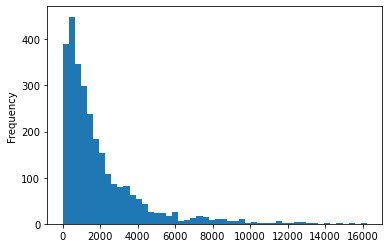

In [41]:
df['length'].plot(bins=50,kind='hist')

In [42]:
X=df.subject1.values
y=df.label.values

In [43]:
X

array(['job post appl research center ',
       'queri letter frequenc text identif ', 'risk ', ...,
       'anglic compos name ', '6 797 compar method n ari comparison ',
       'american english australia '], dtype=object)

# Train and Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [45]:
print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))

X_train : 1896
X_test  : 935
y_train : 1896
y_test  : 935


# MODEL CREATE 

In [46]:

from sklearn.naive_bayes import MultinomialNB

In [47]:
CV = CountVectorizer(stop_words="english")

In [48]:
X_train1 = CV.fit_transform(X_train)

In [49]:
X_train1

<1896x2164 sparse matrix of type '<class 'numpy.int64'>'
	with 6455 stored elements in Compressed Sparse Row format>

In [50]:
NB = MultinomialNB()

In [51]:
NB.fit(X_train1,y_train)

MultinomialNB()

In [52]:
X_test1 = CV.transform(X_test)

In [53]:
x_predict = NB.predict(X_test1)

In [54]:
#x_predict

In [55]:
#y_test

# CHECK ACCURACY

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracyScore = accuracy_score(y_test,x_predict)*100

In [58]:
accuracyScore

92.40641711229947

In [59]:
from sklearn.metrics import confusion_matrix


confusion_matrix(x_predict, y_test)

array([[763,  63],
       [  8, 101]], dtype=int64)

In [60]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model=model.fit(X_train1.toarray(),y_train)
model
predicted_yGNB = model.predict(X_test1.toarray())
confusion_matrix(predicted_yGNB, y_test)
accuracyScoreGNB = accuracy_score(y_test,predicted_yGNB)*100
print("accuracy ",accuracyScoreGNB)

accuracy  90.37433155080214


In [61]:
# we choose  more accurate model 

In [64]:


msg = input("Enter Message: ")
msgInput = CV.transform([msg])
predict = NB.predict(msgInput)
if(predict[0]==0):
    print("SPAM MESSAGE")
else:
    print("HAM MESSAGE")



Enter Message: 
SPAM MESSAGE


In [65]:
df[df["label"]==1]

subject  \
21    free                                    
38    the internet success toolbox            
84    free stealth 3 0 bulk email software    
85    need more money                         
86    cable decsrambler now only 6 99         
...                                ...        
2884  did that work for you calsvxtn          
2886  from fanny recommending nek             
2887  win 300usd and a cruise                 
2888  love your profile ysuolvpv              
2889  you have been asked to join kiddin      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               